In [1]:
#!pip install statsmodels 

In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
#import statsmodels.formula.api as smf
from sklearn import preprocessing
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
df=pd.read_excel(r"D:\dinesh document\EXCELR\Data Science\Assingment\Logistic_Regression_Assingment\bank_full.xlsx").dropna()
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


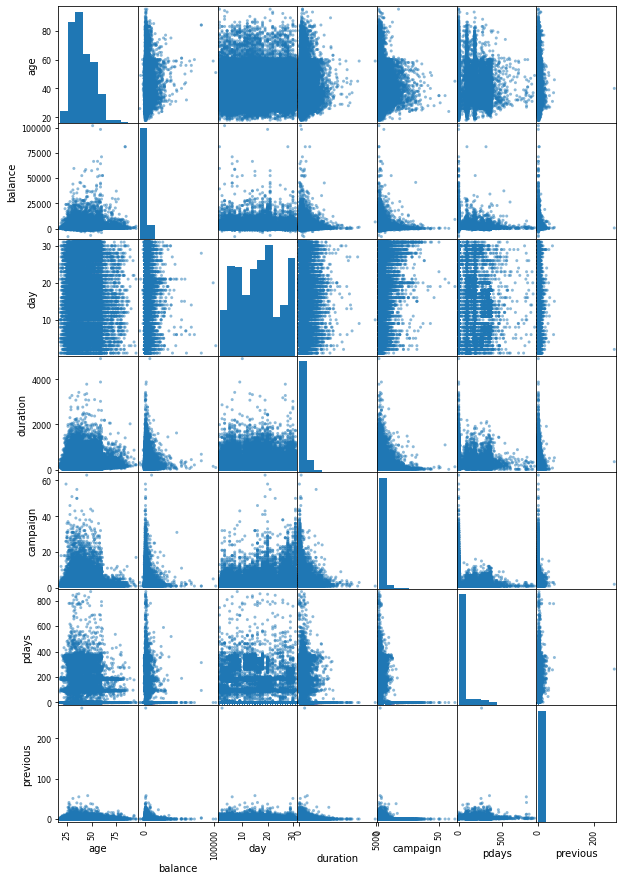

In [4]:
pd.plotting.scatter_matrix(df,figsize=(10,15))
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [6]:
le = preprocessing.LabelEncoder()
df[['job','marital','education','default','housing','loan','contact','month','poutcome']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome']].apply(le.fit_transform)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


In [8]:
df['y']=np.where(df['y']=='no',0,1)

In [9]:
X,Y=df.iloc[:,:16],df.y

In [10]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [11]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [12]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=.20)

In [13]:
y_test

2919     0
6304     0
36688    0
8633     0
848      0
        ..
21383    0
29049    0
35814    1
18372    0
9430     0
Name: y, Length: 9043, dtype: int32

In [14]:
clf=LogisticRegression(C=1.0,tol=0.001)

In [15]:
clf.fit(x_train,y_train)

LogisticRegression(tol=0.001)

In [16]:
pred=clf.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
accuracy_score(y_test,pred)

0.8904124737365918

In [18]:
recall_score(y_test,pred)

0.19348659003831417

In [19]:
precision_score(y_test,pred)

0.5754985754985755

#### Conclusion: Performance of logistic regression model is not good on test data because data is unbalanced

### Data Balancing

In [20]:
y_train.value_counts()

0    31923
1     4245
Name: y, dtype: int64

In [24]:
df_yes = df.loc[df["y"]==1]
print(df_yes.shape)
df_no = df.loc[df["y"]==0]
print(df_no.shape)

(5289, 17)
(39922, 17)


In [25]:
df_no_sample = df_no.sample(n = 5289, replace = False)

In [26]:
data_balance = pd.concat([df_no_sample, df_yes], ignore_index=True)
data_balance = data_balance.sample(n=len(data_balance), replace=False)


In [27]:
data_balance.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8342,79,5,1,1,0,668,0,0,1,2,5,363,1,-1,0,3,1
3760,49,3,1,1,0,3812,0,0,2,9,6,121,2,-1,0,3,0
1950,34,3,1,2,0,1265,1,0,0,17,9,118,1,164,3,0,0
6513,49,9,2,1,0,-188,1,1,0,17,9,454,1,-1,0,3,1
1492,41,9,0,2,0,3465,1,0,0,11,1,389,4,-1,0,3,0


### Train Test Split on Balanced Data

In [28]:
x = data_balance[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
y = data_balance['y']
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2, random_state=42)

In [29]:
print(len(y_train))

8462


In [30]:
print(len(x_train))

8462


### Training logistic regression on balance data

In [31]:
log_clf_balance = LogisticRegression(random_state=0).fit(x_train, y_train)

In [32]:
train_y_pred = log_clf_balance.predict(x_train)
print('Training accuracy',accuracy_score(y_train, train_y_pred))
print('Training precision',precision_score(y_train, train_y_pred))
print('Training recall',recall_score(y_train, train_y_pred))
print('f1_Score',f1_score(y_train, train_y_pred))

Training accuracy 0.7682580950129992
Training precision 0.7793221165569373
Training recall 0.7516462841015993
f1_Score 0.7652340476475517


In [33]:
train_y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
test_y_pred = log_clf_balance.predict(x_test)
print('Testing accuracy',accuracy_score(y_test, test_y_pred))
print('Testing precision',precision_score(y_test, test_y_pred))
print('Testing recall',recall_score(y_test, test_y_pred))
print('Testing f1_Score',f1_score(y_test, test_y_pred))

Testing accuracy 0.7618147448015122
Testing precision 0.76
Testing recall 0.7512054001928641
Testing f1_Score 0.7555771096023278


In [37]:
test_y_pred

array([1, 0, 1, ..., 1, 1, 1])

#### Conclusion : Accuracy,Precision,Recall, f1_score are good for test data with logistic regression 

### ROC curve

In [42]:
y_pred_proba = log_clf_balance.predict_proba(x_test)[::,1]

In [43]:
y_pred_proba

array([0.87851267, 0.19174051, 0.66282038, ..., 0.79431179, 0.98706314,
       0.87112956])

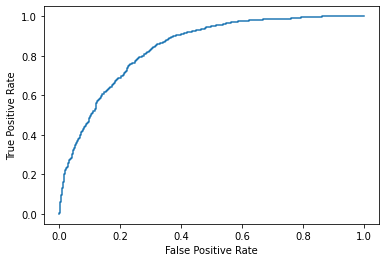

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

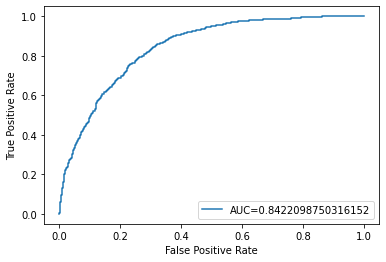

In [48]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### AUC is close to 1 hence train model is good for prediction.